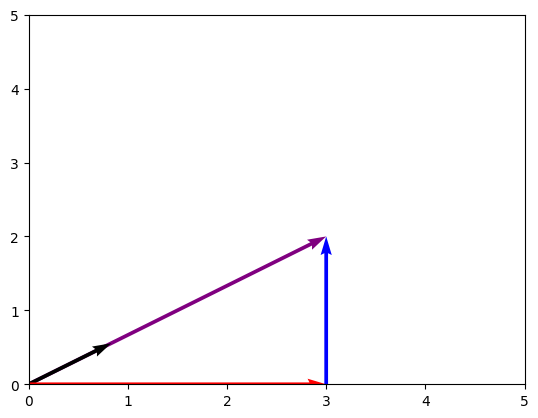

In [65]:
import math
import matplotlib.pyplot as plt
x1, y1 = 0, 0
x2, y2 = 3, 2
z = math.sqrt(((x2-x1)**2) + ((y2-y1)**2))

rx, ry = x2-x1, y2-y1
rhatx, rhaty = (x2-x1)/z, (y2-y1)/z

plt.quiver(x1, y1, rx, ry, color='purple', scale_units='xy', angles = 'xy', scale=1)
plt.quiver(x1, x1, rhatx, rhaty, color='black', scale_units='xy', angles = 'xy', scale=1)
plt.quiver(x1, x1, rx, 0, color='red', scale_units='xy', angles = 'xy', scale=1)
plt.quiver(x2, y1, 0, ry, color='blue', scale_units='xy', angles = 'xy', scale=1)
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()


In [142]:
# practice 3
import math
import matplotlib.pyplot as plt

mmass = 7.3 * 10**22 # kg
emass = 5.97 * 10**24 # kg
sd = 3.84 * 10**8 # m
Vme = 1.00 * 10**3 # m/s
gc = 6.67 * 10**-11
t = 0.001
mxe = Vme
mye = Vme
x1, y1 = 0, 0 # earth
x2, y2 = 0, 5 # moon
z = math.sqrt(((x2-x1)**2) + ((y2-y1)**2))
z2 = z**2
rx, ry = x2-x1, y2-y1
rhatx, rhaty = (x2-x1)/z, (y2-y1)/z

r = [rx,ry]
rhat = [rhatx, rhaty]
xpos = []
ypos = []
pos = []
acs = []
x1, y1 = 0, 0 # earth
x2, y2 = sd, sd # moon
while t<10:
    z = math.sqrt(((x2-x1)**2) + ((y2-y1)**2))
    rx, ry = x2-x1, y2-y1
    rhatx, rhaty = (x2-x1)/z, (y2-y1)/z
    fgx = ((-gc*mmass*emass)/(rx**2))*rhatx
    fgy = ((-gc*mmass*emass)/(ry**2))*rhaty
    mxa = mmass*fgx
    mya = mmass*fgy
    mxv = mxv+(mxa*t)
    myv = myv+(mya*t)
    x1 += mxv
    y1 += myv
    print(f"radial unit vector: {[rhatx, rhaty]}")
    print(f"moon gravity x-component: {fgx}")
    print(f"moon gravity y-component: {fgy}")
    print(f"moon acceleration x-component: {mxa}")
    print(f"moon acceleration y-component: {mya}")
    print(f"moon position: {x1,y1}")
    xpos.append(x1)
    ypos.append(y1)
    pos.append((x1,y1))
    acs.append(mya)
    print()
    t += 0.01
# plt.plot(xpos, ypos)
plt.show()

NameError: name 'mxv' is not defined

 Wedge area: 1350012941533618.2
 Wedge area: 1466441529326807.2
8.624257161633263


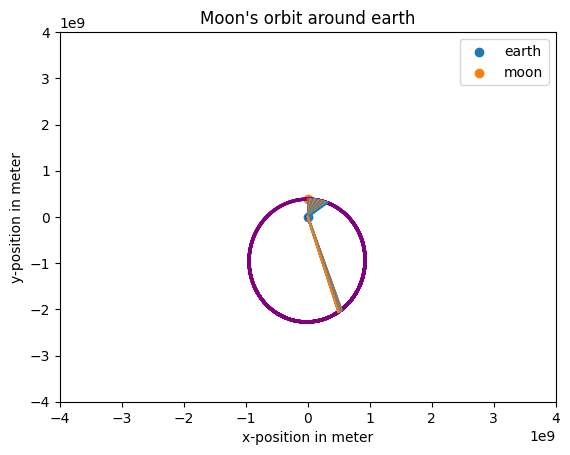

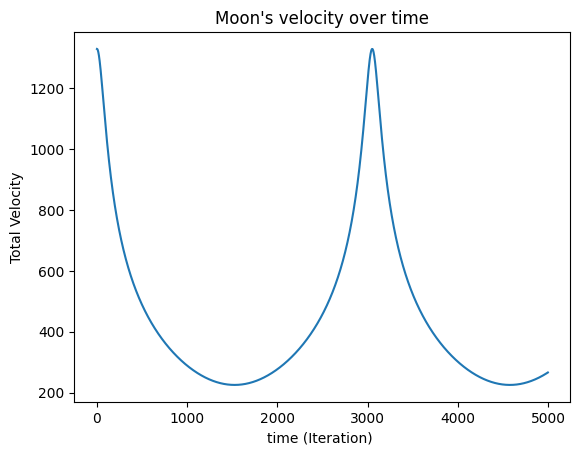

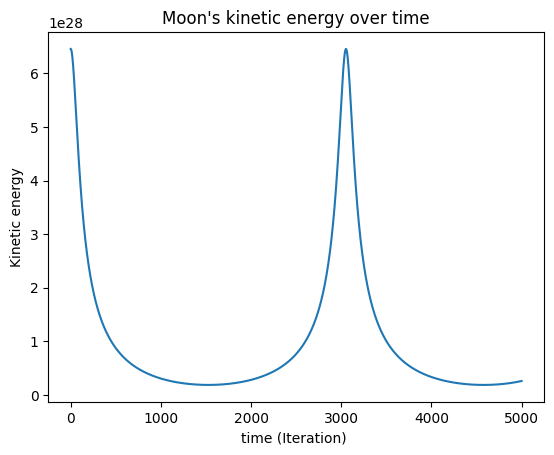

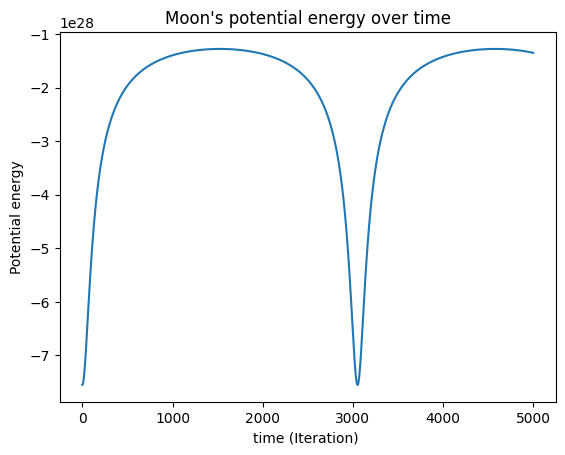

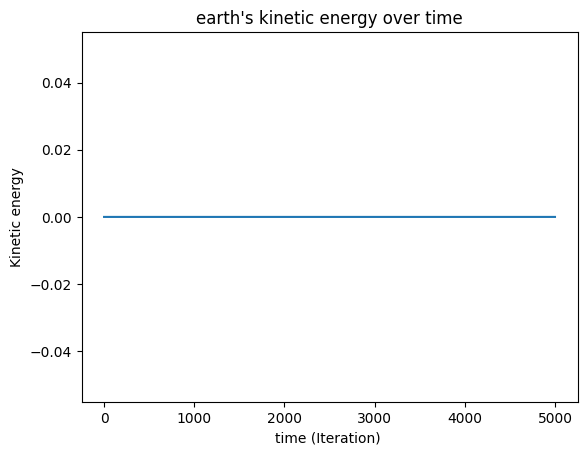

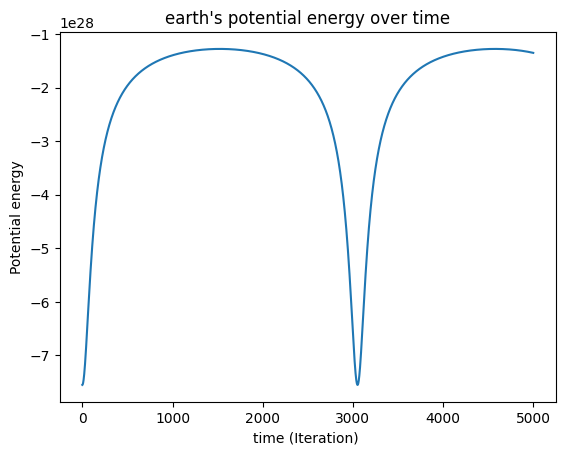

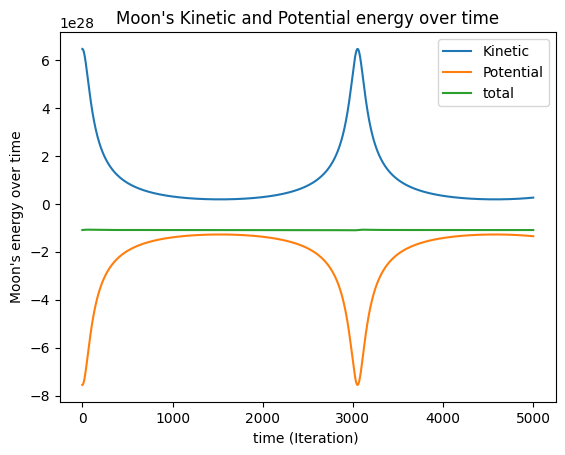

In [140]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# values
mmass = 7.3 * 10**22 # kg
emass = 5.97 * 10**24 # kg
sd = 3.85 * 10**8 # m
# mvx = 1 * 10**3 # m/s # circle
mvx = 1.33 * 10**3 # m/s # ellipse
# mvx = 1.5 * 10**3 # m/s # parabola
mvy = 0 # m/s
evx = 0 # m/s
evy = 0 # m/s
gc = 6.67 * 10**-11
# timestep
t = 5000
it = 0

# initial position of each
ex, ey = 0,0 # earth
mx, my = 0, sd # moon

# plot the initial position of the moon and the earth
plt.scatter(ex,ey)
plt.scatter(mx,my)

# set window size
# plt.xlim([-4e8,4e8])
# plt.ylim([-4e8,4e8])

plt.xlim([-4e9,4e9])
plt.ylim([-4e9,4e9])

# lists for keeping track of values for graph
mxs = []
mys = []
exs = []
eys = []
mxaccs = []
myaccs = []
mrxs = []
mrys = []
mkes = []
mpes = []
ekes = []
epes = []
totalme = []
mxgravs = []
mygravs = []
mzvs = []
rx, ry = 0, sd
wedge = 0
ncount = 0
wedges = []
# linearization loop, updating gravity, acceleration, velocity, and then position
while it < 5000:
    rx, ry = mx-ex, my-ey
    rhat = ((rx**2)+(ry**2))**0.5
    # x and y components of gravity for the moon and the earth
    r = math.dist((mx, my), (ex,ey))**2
    m_fgx = ((-gc*mmass*emass)/r)*(rx/rhat)
    m_fgy = ((-gc*mmass*emass)/r)*(ry/rhat)
    e_fgx = ((-gc*mmass*emass)/r)*(rx/rhat)
    e_fgy = ((-gc*mmass*emass)/r)*(ry/rhat)
    # f = ma but reversed to find acceleration
    mxa = m_fgx/mmass
    mya = m_fgy/mmass
    exa = e_fgx/emass
    eya = e_fgy/emass
    # linearization for updating velocities
    mvx = mvx + (mxa*t)
    mvy = mvy + (mya*t)
    evx = evx + (exa*t)
    evy = evy + (eya*t)
    # linearization for updating positions
    mx = mx + (mvx*t)
    my = my + (mvy*t)
    ex = ex + (evx*t)
    ey = ey + (evy*t)
    ex = 0
    ey = 0
    evx = 0
    evy = 0
    # combined velocity applying pythagorean theorem
    mzv = math.hypot(mvx, mvy)
    ezv = math.hypot(evx, evy)
    # kinetic energy
    mke = 0.5 * mmass * (mzv**2)
    eke = 0.5 * emass * (ezv**2)
    # potential energy
    mpe = (-gc*mmass*emass)/(math.dist((mx, my), (ex,ey)))
    epe = (-gc*mmass*emass)/(math.dist((ex, ey), (mx,my)))
    # printing values
    # print(f"moon kE: {mke} Joules")
    # print(f"moon pE: {mpe} Joules")
    # print(f"earth kE: {eke} Joules")
    # print(f"earth pE: {epe} Joules")
    # print(f"Total moon energy: {mke+mpe}")
    # print()
    # appending to lists to keep track of values and for graphing purpose
    mxs.append(mx)
    mys.append(my)
    exs.append(ex)
    eys.append(ey)
    mxaccs.append(mvx)
    myaccs.append(mvy)
    mrxs.append(rx)
    mrys.append(ry)
    mkes.append(mke)
    mpes.append(mpe)
    ekes.append(eke)
    epes.append(epe)
    totalme.append(mke+mpe)
    mxgravs.append(m_fgx)
    mygravs.append(m_fgy)
    mzvs.append(mzv)
    # calculating area
    sep_rnx = mx-mxs[it-1]
    sep_rny = my-mys[it-1]
    sep_rnz = math.hypot(mx-mxs[it-1], my-mys[it-1])
    sep_me = math.dist((mx, my), (ex,ey))
    w_height = math.dist((((mx+mxs[it-1])/2), ((my+mys[it-1])/2)), (ex, ey))
    tri_a = 0.5*sep_rnz*w_height
    # print(sep_rnz)
    # print(sep_me)
    # print(w_height)
    interval1 = [0, 50]
    interval2 = [1000, 1050]
    if it >= interval1[0] and it <= interval1[1] or it >= interval2[0] and it <= interval2[1]: 
        plt.plot([(mx+mxs[it-1])/2,ey], [(my+mys[it-1])/2,ey])
        wedge += tri_a
    if it == interval1[1] or it == interval2[1]:
        print(f" Wedge area: {wedge}")
        wedges.append(wedge)
    else:
        ncount = 0
        wedge = 0
    # updating time step (big time step because values are really big)
    it += 1
# loop throug all the values and plot the vectors from each point to another, creating an ellipse ultimately.

for i in range(len(mxs)-1):
    plt.quiver(mxs[i], mys[i], mxs[i+1]-mxs[i], mys[i+1]-mys[i], color='purple', scale_units='xy', angles = 'xy', scale=1)
    plt.quiver(exs[i], eys[i], exs[i+1]-exs[i], eys[i+1]-eys[i], color='blue', scale_units='xy', angles = 'xy', scale=1)
    # if i%50 == 0:
        # plt.quiver(mxs[i], mys[i], mxgravs[i], mygravs[i], color='blue', scale_units='xy', angles = 'xy', scale=1e12)
        # gravity
        # plt.quiver(mxs[i], mys[i], mxgravs[i], 0, color='orange', scale_units='xy', angles = 'xy', scale=1e12)
        # plt.quiver(mxs[i], mys[i], 0, mygravs[i], color='red', scale_units='xy', angles = 'xy', scale=1e12)
        # # velocity
        # plt.quiver(mxs[i], mys[i], mxaccs[i], 0, color='green', scale_units='xy', angles = 'xy', scale=1e-5)
        # plt.quiver(mxs[i], mys[i], 0, myaccs[i], color='brown', scale_units='xy', angles = 'xy', scale=1e-5)
print(((wedges[1]/wedges[0])-1)*100)

# graphs
plt.legend(['earth', 'moon'])
plt.xlabel('x-position in meter')
plt.ylabel('y-position in meter')
plt.title("Moon's orbit around earth")
plt.show()

plt.plot(mzvs)
plt.xlabel('time (Iteration) ')
plt.ylabel('Total Velocity')
plt.title("Moon's velocity over time")
plt.show()

# moon kinetic energy graph
plt.plot(mkes)
plt.xlabel('time (Iteration) ')
plt.ylabel('Kinetic energy')
plt.title("Moon's kinetic energy over time")
plt.show()

# moon potential energy graph(negative)
plt.plot(mpes)
plt.xlabel('time (Iteration) ')
plt.ylabel('Potential energy')
plt.title("Moon's potential energy over time")
plt.show()

# earth kinetic energy graph
plt.plot(ekes)
plt.xlabel('time (Iteration) ')
plt.ylabel('Kinetic energy')
plt.title("earth's kinetic energy over time")
plt.show()

# earth potential energy graph(negative)
plt.plot(epes)
plt.xlabel('time (Iteration) ')
plt.ylabel('Potential energy')
plt.title("earth's potential energy over time")
plt.show()

plt.plot(mkes)
plt.plot(mpes)
plt.plot(totalme)
plt.xlabel('time (Iteration) ')
plt.ylabel('Moon\'s energy over time')
plt.legend(['Kinetic', 'Potential', 'total'])
plt.title('Moon\'s Kinetic and Potential energy over time')
plt.show()